In [1]:
from analysis_functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
new_uqc_path = "../../results/uqc_encoding/4qubits_continuous_encoding"
old_uqc_path = "../../results/overparametrization/4_qubits_5layer"

new_uqc = Analysis(new_uqc_path)
old_uqc = Analysis(old_uqc_path)

In [3]:
new_uqc_return = new_uqc.get_rewards()
old_uqc_return = old_uqc.get_rewards()

new_uqc_mean = np.mean(new_uqc_return, axis=0)
old_uqc_mean = np.mean(old_uqc_return, axis=0)

new_uqc_std = np.std(new_uqc_return, axis=0)
old_uqc_std = np.std(old_uqc_return, axis=0)

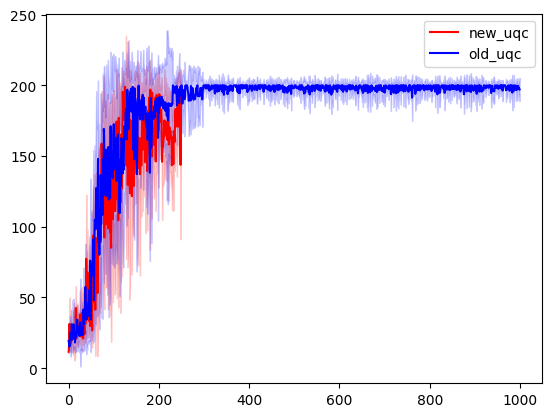

In [4]:
plt.plot(new_uqc_mean, color = "red", label="new_uqc")
plt.plot(old_uqc_mean, color = "blue", label="old_uqc")
plt.fill_between(np.arange(len(new_uqc_mean)), new_uqc_mean - new_uqc_std, new_uqc_mean + new_uqc_std, color = "red", alpha = 0.2)
plt.fill_between(np.arange(len(old_uqc_mean)), old_uqc_mean - old_uqc_std, old_uqc_mean + old_uqc_std, color = "blue", alpha = 0.2)
plt.legend()
plt.show()
